<a href="https://colab.research.google.com/github/shashankkshettyy/Pneumonia_classifier/blob/main/PneumoniaVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
import tensorflow as tf


from keras.layers import Dropout

from keras.preprocessing.image import ImageDataGenerator


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/chest_xray/test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
model=Sequential()
pre_model=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
    pooling=max,
    classes=2,
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_model.layers :
  layer.trainable=False
model.add(pre_model)
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(training_set ,epochs = 50)


In [ ]:


import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']



# Plot loss and accuracy on the same graph

plt.plot(train_loss, label='Training Loss')
plt.plot(train_accuracy, label='Training Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Loss and Accuracy during Training')
plt.legend()
plt.show()


# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


63/63 [==============================] - 3s 39ms/step
[[11  9  9 20 25  1]
 [14 21 11 29 26  0]
 [12 12 12 22 23  1]
 [17 22 18 33 25  4]
 [24 19 19 20 14  1]
 [ 5  4  4  8  6  1]]


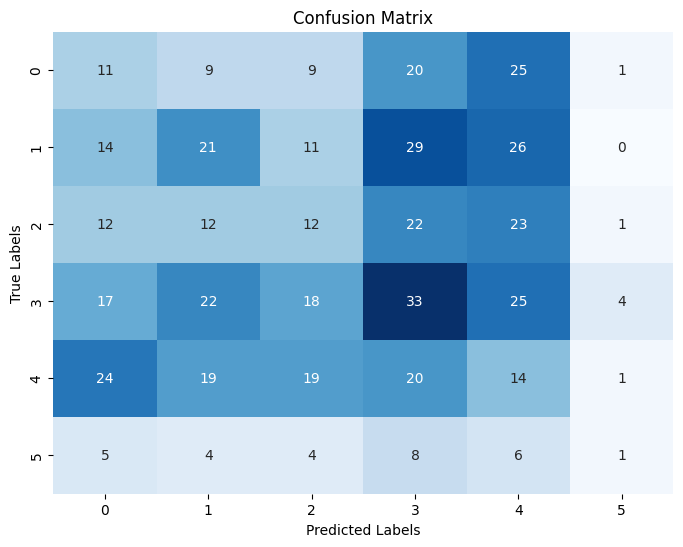

In [ ]:
from sklearn.metrics import confusion_matrix

# Get true labels
true_labels = test_set.classes

# Generate predicted labels for all test images
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix with colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()